<a href="https://colab.research.google.com/github/HollowMike8/multi-class-object-detection-and-bounding-box/blob/main/predict_multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git
!git init

In [2]:
!git clone https://github.com/HollowMike8/multi-class-object-detection-and-bounding-box.git

Cloning into 'multi-class-object-detection-and-bounding-box'...
remote: Enumerating objects: 2089, done.
remote: Counting objects: 100% (2089/2089), done.
remote: Compressing objects: 100% (2081/2081), done.
remote: Total 2089 (delta 11), reused 2079 (delta 6), pack-reused 0
Receiving objects: 100% (2089/2089), 25.27 MiB | 26.21 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
%cd multi-class-object-detection-and-bounding-box/

/content/multi-class-object-detection-and-bounding-box


In [4]:
import os
import cv2
import pickle
import mimetypes
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [5]:
path_dir: str = r"/content/bounding-box-regression-keras"

import sys
sys.path.insert(0,path_dir)
from pyimagesearch import config

In [6]:
input = config.test_filenames
# check if the input is a single image or a list of images in txt file
filetype = mimetypes.guess_type(input)[0]

if "text/plain" == filetype:
  filenames = open(input, "r").read().strip().split("\n")

  imagePaths = []
  for filename in filenames:
    p = os.path.join(config.images_path, filename)
    imagePaths.append(p)

elif "image/jpeg" == filetype or "image/png" == filetype:
  imagePaths = [input]

In [ ]:
# load the object detector and label encoder
model = load_model(config.model_path)
le = pickle.loads(open(config.le_path, "rb").read())

# empty list to store final images
bb_images = []

# perform a forward pass on the test image/images
for imagePath in imagePaths:
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)/255.0
  image = np.expand_dims(image, axis=0)

  # predict the bounding box of the object and the class
  (bbox_preds, label_preds) = model.predict(image)
  (startX, startY, endX, endY) = bbox_preds[0]

  # invert the one-hot vector to get the label
  i = np.argmax(label_preds, axis=1)
  label = le.classes_[i][0]

  # read the test image an upscale the bounding box coordinates
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  (h, w) = image.shape[:2]

  startX = int(startX*w)
  startY = int(startY*h)
  endX = int(endX*w)
  endY = int(endY*h)

  # draw the bounding box and the label on the object
  cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

  y = startY - 10 if startY - 10 > 10 else startY + 10
  cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 
              0.65, (0, 255, 0), 2)
  
  bb_images.append(image)

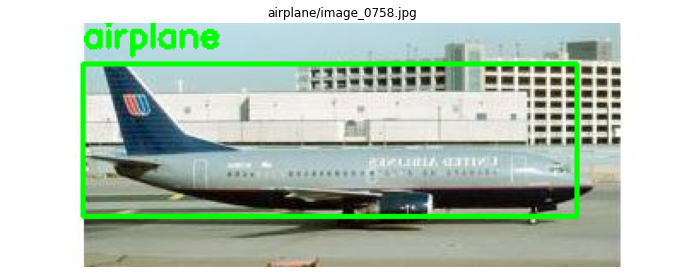

In [39]:
# plot the images with bounding box around objects
index = np.random.randint(len(bb_images))

fig = plt.figure(figsize = (12,8))
plt.imshow(bb_images[index])
plt.axis("off")
plt.title("%s"% filenames[index])

plt.show()